# EE4685 Assignment 2 - Red Wine Quality Classification

1. Import Libs

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn_rvm import EMRVC
from sklearn.metrics import confusion_matrix
import time
from scipy.stats import pearsonr
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

2. Read Data

In [2]:
np.set_printoptions(threshold=np.inf)
data = pd.read_csv('winequality-red.csv')
X = data.iloc[:,0:11]
y = data.iloc[:,11]

3. Feature Selection

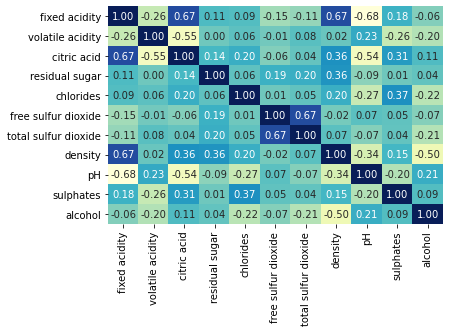

In [3]:
features = data.columns.values.tolist()
features = features[0:-1]
pc = np.ones([len(features), len(features)])

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        pc[i, j] = pearsonr(data[features[i]], data[features[j]])[0]
        pc[j, i] = pc[i, j]

pc = pd.DataFrame(pc)
sns.heatmap(pc, xticklabels=data.columns.values[0:-1], yticklabels=data.columns.values[0:-1], annot=True, cmap="YlGnBu",
            cbar=False, fmt='.2f')
plt.show()

4. Random Split + Orignial Dataset

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=34)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

t_start_knn = time.time()
clf1 = KNeighborsClassifier(n_neighbors = 45)
clf1.fit(X_train, y_train)
preds_knn = clf1.predict(X_test)
print('The score of KNN classifier is: %f'%(clf1.score(X_test, y_test)))
t_end_knn = time.time()
cpu_usage_time_knn = t_end_knn - t_start_knn
print(confusion_matrix(y_test, preds_knn))
print(cpu_usage_time_knn)

t_start_rf = time.time()
clf2 = RandomForestClassifier(n_estimators=60)
clf2.fit(X_train, y_train)
preds_randomforest = clf2.predict(X_test)
print('The score of RandomForest classifier is: %f'%(clf2.score(X_test, y_test)))
t_end_rf = time.time()
cpu_usage_time_rf = t_end_rf - t_start_rf
print(confusion_matrix(y_test, preds_randomforest))
print(cpu_usage_time_rf)

t_start_svm = time.time()
clf3 = svm.SVC(decision_function_shape='ovo')
clf3.fit(X_train, y_train)
preds_svm = clf3.predict(X_test)
print('The score of svm classifier is: %f'%(clf3.score(X_test, y_test)))
t_end_svm = time.time()
cpu_usage_time_svm = t_end_svm - t_start_svm
print(confusion_matrix(y_test, preds_svm))
print(cpu_usage_time_svm)

t_start_nb = time.time()
clf4 = GaussianNB()
clf4.fit(X_train, y_train)
preds_nb = clf4.predict(X_test)
print('The score of naive bayes classifier is: %f'%(clf4.score(X_test, y_test)))
t_end_nb = time.time()
cpu_usage_time_nb = t_end_nb - t_start_nb
print(confusion_matrix(y_test, preds_nb))
print(cpu_usage_time_nb)

t_start_rvm = time.time()
clf5 = EMRVC(kernel="rbf")
clf5.fit(X_train, y_train)
preds_rvm = clf5.predict(X_test)
print('The score of RVM classifier is: %f'%(clf5.score(X_test, y_test)))
t_end_rvm = time.time()
cpu_usage_time_rvm = t_end_rvm - t_start_rvm
print(confusion_matrix(y_test, preds_rvm))
print(cpu_usage_time_rvm)


The score of KNN classifier is: 0.597500
[[  0   0   6   0   0   0]
 [  0   0  19   6   0   0]
 [  0   0 257  79   0   0]
 [  0   0 110 206  10   0]
 [  0   0   9  80  15   0]
 [  0   0   0   2   1   0]]
0.09268951416015625
The score of RandomForest classifier is: 0.657500
[[  0   0   6   0   0   0]
 [  1   0  18   6   0   0]
 [  0   0 279  56   1   0]
 [  0   1  98 203  24   0]
 [  0   0   8  51  44   1]
 [  0   0   0   2   1   0]]
0.16445016860961914
The score of svm classifier is: 0.607500
[[  0   0   5   1   0   0]
 [  0   0  21   4   0   0]
 [  0   0 266  69   1   0]
 [  0   0 113 190  23   0]
 [  0   0   7  67  30   0]
 [  0   0   0   2   1   0]]
0.20929956436157227
The score of naive bayes classifier is: 0.541250
[[  0   5   1   0   0   0]
 [  0   8  11   5   0   1]
 [  3  50 188  84  11   0]
 [  2  18  66 175  60   5]
 [  0   4   6  31  62   1]
 [  0   0   0   2   1   0]]
0.0029900074005126953
The score of RVM classifier is: 0.581250
[[  0   0   6   0   0   0]
 [  1   0  20   4

6. Random Split + Feature Selection

In [5]:
X_selected = X.drop('fixed acidity', axis=1)

X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.5,random_state=34)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

t_start_knn = time.time()
clf1 = KNeighborsClassifier(n_neighbors = 45)
clf1.fit(X_train, y_train)
preds_knn = clf1.predict(X_test)
print('The score of KNN classifier is: %f'%(clf1.score(X_test, y_test)))
t_end_knn = time.time()
cpu_usage_time_knn = t_end_knn - t_start_knn
print(confusion_matrix(y_test, preds_knn))
print(cpu_usage_time_knn)

t_start_rf = time.time()
clf2 = RandomForestClassifier(n_estimators=60)
clf2.fit(X_train, y_train)
preds_randomforest = clf2.predict(X_test)
print('The score of RandomForest classifier is: %f'%(clf2.score(X_test, y_test)))
t_end_rf = time.time()
cpu_usage_time_rf = t_end_rf - t_start_rf
print(confusion_matrix(y_test, preds_randomforest))
print(cpu_usage_time_rf)

t_start_svm = time.time()
clf3 = svm.SVC(decision_function_shape='ovo')
clf3.fit(X_train, y_train)
preds_svm = clf3.predict(X_test)
print('The score of svm classifier is: %f'%(clf3.score(X_test, y_test)))
t_end_svm = time.time()
cpu_usage_time_svm = t_end_svm - t_start_svm
print(confusion_matrix(y_test, preds_svm))
print(cpu_usage_time_svm)

t_start_nb = time.time()
clf4 = GaussianNB()
clf4.fit(X_train, y_train)
preds_nb = clf4.predict(X_test)
print('The score of naive bayes classifier is: %f'%(clf4.score(X_test, y_test)))
t_end_nb = time.time()
cpu_usage_time_nb = t_end_nb - t_start_nb
print(confusion_matrix(y_test, preds_nb))
print(cpu_usage_time_nb)

t_start_rvm = time.time()
clf5 = EMRVC(kernel="rbf")
clf5.fit(X_train, y_train)
preds_rvm = clf5.predict(X_test)
print('The score of RVM classifier is: %f'%(clf5.score(X_test, y_test)))
t_end_rvm = time.time()
cpu_usage_time_rvm = t_end_rvm - t_start_rvm
print(confusion_matrix(y_test, preds_rvm))
print(cpu_usage_time_rvm)


The score of KNN classifier is: 0.603750
[[  0   0   6   0   0   0]
 [  0   0  20   5   0   0]
 [  0   0 267  69   0   0]
 [  0   0 112 204  10   0]
 [  0   0  10  82  12   0]
 [  0   0   0   1   2   0]]
0.05082893371582031
The score of RandomForest classifier is: 0.633750
[[  0   0   6   0   0   0]
 [  1   0  17   7   0   0]
 [  0   0 271  63   2   0]
 [  0   0 109 191  26   0]
 [  0   0   9  49  45   1]
 [  0   0   0   1   2   0]]
0.1634526252746582
The score of svm classifier is: 0.601250
[[  0   0   5   1   0   0]
 [  0   0  22   3   0   0]
 [  0   0 266  70   0   0]
 [  0   0 116 188  22   0]
 [  0   0  10  67  27   0]
 [  0   0   0   1   2   0]]
0.1823897361755371
The score of naive bayes classifier is: 0.547500
[[  0   5   1   0   0   0]
 [  0   8  11   5   0   1]
 [  0  44 193  92   7   0]
 [  0  15  68 182  56   5]
 [  0   3   6  39  55   1]
 [  0   0   0   2   1   0]]
0.001992464065551758
The score of RVM classifier is: 0.600000
[[  0   1   4   1   0   0]
 [  0   1  15   9   

7. Stratified K-fold Cross-validation + Original Dataset

In [3]:
skfolds = StratifiedKFold(n_splits=5, random_state=34, shuffle=True)
score_KNN = []
score_RandomForest = []
score_SVM = []
score_NB = []
score_RVM = []
for train_index, test_index in skfolds.split(X, y):
    print('train -  {}   |   test -  {}'.format(np.bincount(y[train_index]), np.bincount(y[test_index])))

    scaler = StandardScaler()
    X_train_folds = X.values[train_index]
    scaler.fit(X_train_folds)
    X_train_folds = scaler.transform(X_train_folds)
    y_train_folds = y.values[train_index]

    X_test_fold = X.values[test_index]
    scaler.fit(X_test_fold)
    X_test_fold = scaler.transform(X_test_fold)
    y_test_fold = y.values[test_index]

    clf1 = KNeighborsClassifier(n_neighbors = 45)
    clf1.fit(X_train_folds, y_train_folds)
    score_KNN.append(clf1.score(X_test_fold, y_test_fold))

    
    clf2 = RandomForestClassifier(n_estimators=60)
    clf2.fit(X_train_folds, y_train_folds)
    score_RandomForest.append(clf2.score(X_test_fold, y_test_fold))


    
    clf3 = svm.SVC(decision_function_shape='ovo')
    clf3.fit(X_train_folds, y_train_folds)
    score_SVM.append(clf3.score(X_test_fold, y_test_fold))


    clf4 = GaussianNB()
    clf4.fit(X_train_folds, y_train_folds)
    score_NB.append(clf4.score(X_test_fold, y_test_fold))


    clf5 = EMRVC(kernel="rbf")
    clf5.fit(X_train_folds, y_train_folds)
    score_RVM.append(clf5.score(X_test_fold, y_test_fold))



print(score_KNN)
print(np.mean(score_KNN))
print(score_RandomForest)
print(np.mean(score_RandomForest))
print(score_SVM)
print(np.mean(score_SVM))
print(score_NB)
print(np.mean(score_NB))
print(score_RVM)
print(np.mean(score_RVM))
    

train -  [  0   0   0   8  42 544 511 159  15]   |   test -  [  0   0   0   2  11 137 127  40   3]
train -  [  0   0   0   8  43 545 510 159  14]   |   test -  [  0   0   0   2  10 136 128  40   4]
train -  [  0   0   0   8  43 545 510 159  14]   |   test -  [  0   0   0   2  10 136 128  40   4]
train -  [  0   0   0   8  42 545 510 160  14]   |   test -  [  0   0   0   2  11 136 128  39   4]
train -  [  0   0   0   8  42 545 511 159  15]   |   test -  [  0   0   0   2  11 136 127  40   3]
[0.553125, 0.61875, 0.55, 0.565625, 0.6112852664576802]
0.579757053291536
[0.61875, 0.671875, 0.675, 0.68125, 0.6959247648902821]
0.6685599529780564
[0.5625, 0.646875, 0.6125, 0.640625, 0.6394984326018809]
0.6203996865203762
[0.5125, 0.578125, 0.56875, 0.54375, 0.4890282131661442]
0.5384306426332288
[0.59375, 0.63125, 0.596875, 0.653125, 0.6238244514106583]
0.6197648902821318
